# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [80]:
df = pd.read_csv('./DataFrame.csv')
df.head(2)

,Unnamed: 0,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,0,0,1,1,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,0
1,1,1,0,1,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,0


In [81]:
df = df[['sexo', 'posse_de_veiculo', 'posse_de_imovel',
       'qtd_filhos', 'idade', 'tempo_emprego', 'possui_celular',
       'possui_fone_comercial', 'possui_fone', 'possui_email',
       'qt_pessoas_residencia', 'mau']]

In [82]:
df.head(2)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,0,1,1,0,58.832877,3.106849,1,0,0,0,2.0,0
1,1,0,1,0,52.356164,8.358904,1,0,1,1,1.0,0


In [83]:
# Separando as variáveis explicativas da target

y = df.mau
X = df.drop('mau', axis=1)

In [84]:
# Separando entre treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [85]:
clf = DecisionTreeClassifier(random_state=100)
clf

DecisionTreeClassifier(random_state=100)

In [86]:
clf = clf.fit(X_train,y_train)
clf

DecisionTreeClassifier(random_state=100)

[Text(0.5, 0.5, 'gini = 0.0\nsamples = 11655\nvalue = 11655.0')]

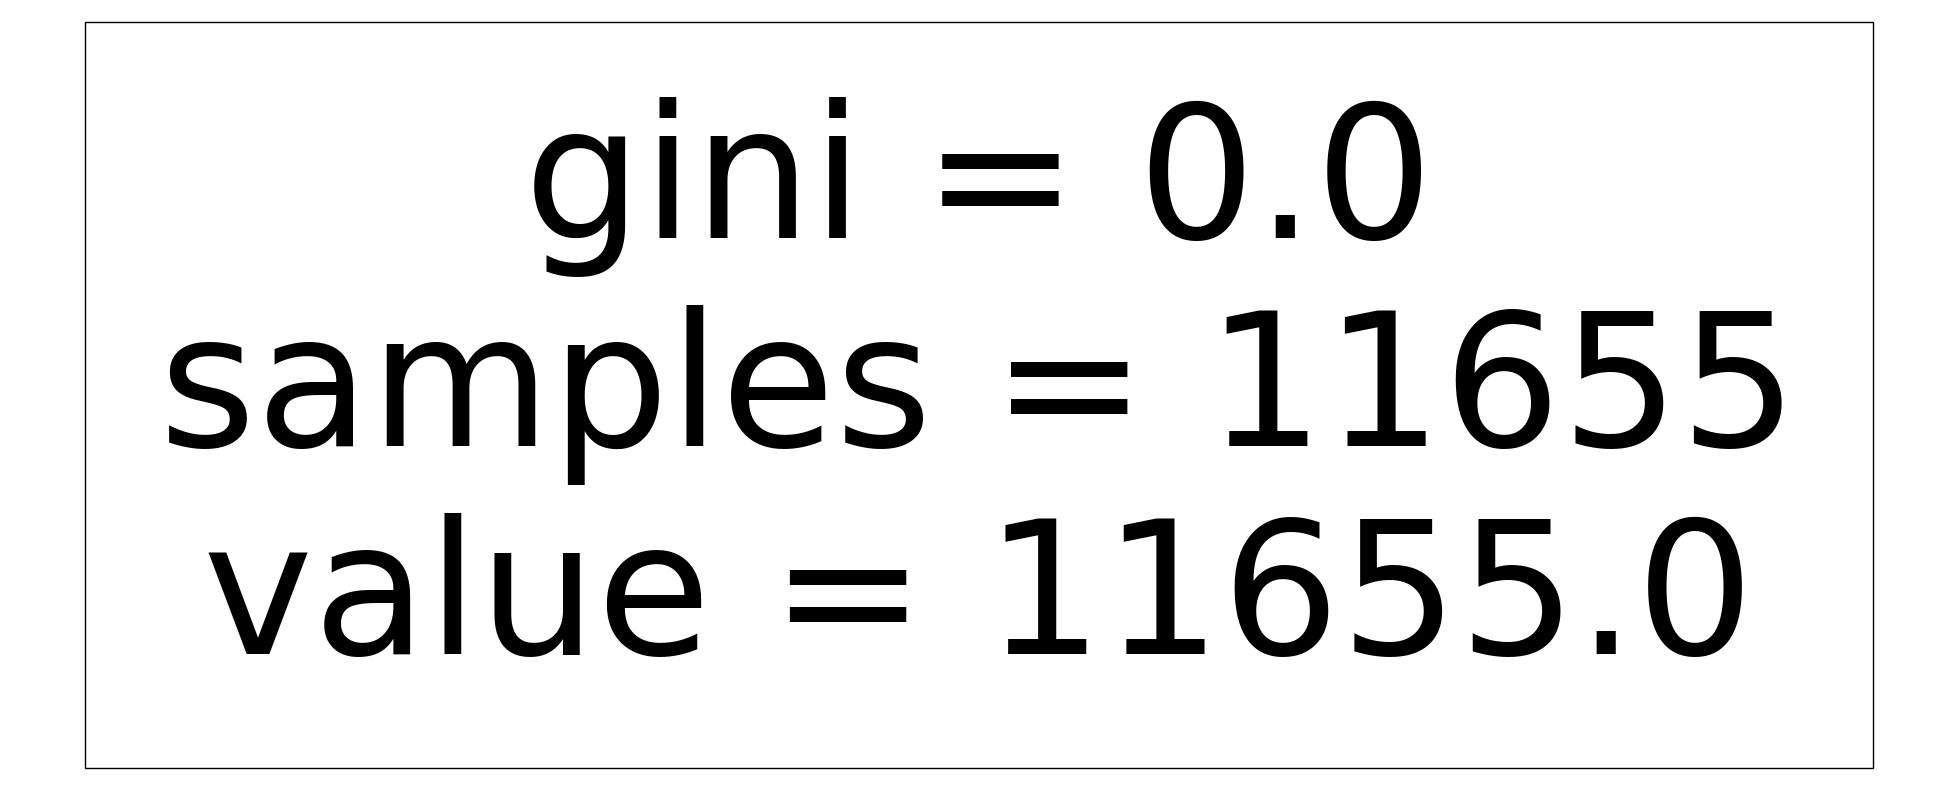

In [87]:
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['Aprovados', 'Resprovados'],
          feature_names=X.columns)

In [88]:
#ConfusionMatrixDisplay.from_estimator(clf, X_train, y_train, display_labels=['Aprovados', 'Resprovados']);

In [89]:
y_pred = clf.predict(X_train)

conf_matrix = confusion_matrix(y_train, y_pred)

print("Matriz de Confusão:")
pd.DataFrame(conf_matrix)

Matriz de Confusão:


,0
0,11655


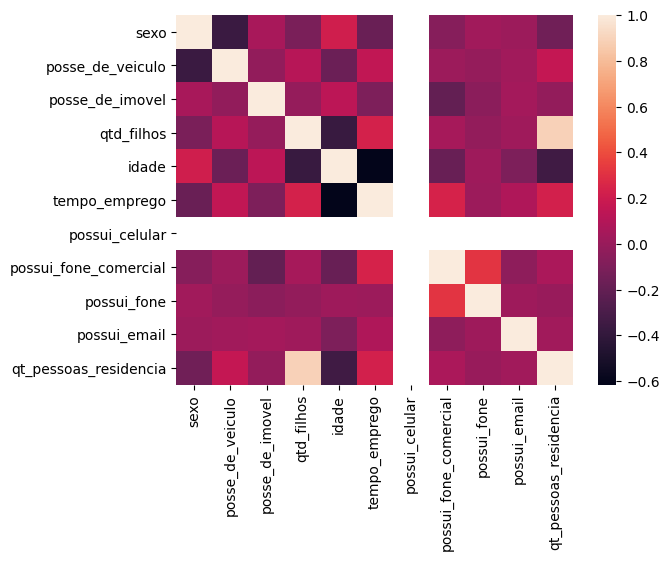

In [90]:
sns.heatmap(X.corr())
plt.show()

In [91]:
predict = clf.predict(X_train)
accuracy_score(y_train, predict)

1.0

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [92]:
# Predição na base de teste
y_pred = clf.predict(X_test)
acurscia = accuracy_score(y_test, y_pred)
acurscia
#predict(f'A acurácia para a base de teste foi de {acurscia:.2f}%')

1.0

In [93]:
# PLOTAGEM DA MATRIZ DE CONFUSÃO DA RELAÇÃO ENTRE A BASE DE TESTE:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[4995]], dtype=int64)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [100]:
# Depois treinar uma nova arvore seguindo as especificações da tarefa, exemplo:
clf_podada = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
clf_podada.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

In [101]:
predict = clf_podada.predict(X_train)
accuracy_score(y_train, predict)

1.0

In [102]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[4995]], dtype=int64)

Refazer os passos acima e verificar novamente a acurácia e a matriz confusão nesta árvore podada.

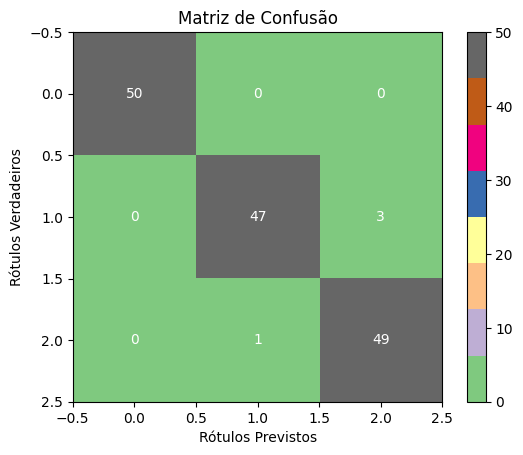

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Carregar o conjunto de dados (por exemplo, Iris dataset)
iris = load_iris()
X = iris.data
y = iris.target

# Instanciar o classificador com os parâmetros especificados
clf = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)

# Treinar o classificador
clf.fit(X, y)

# Prever os rótulos para os dados de entrada
y_pred = clf.predict(X)

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y, y_pred)

# Plotar a matriz de confusão com os números dentro de cada quadrado
plt.imshow(conf_matrix, cmap='Accent', interpolation='nearest')

# Adicionar os números dentro de cada quadrado com cor personalizada
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='White')  # Mudando a cor para vermelho

plt.colorbar()
plt.title('Matriz de Confusão')
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.show()